In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("..")

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)



In [2]:
import re
from scipy.stats import entropy

df = pd.read_csv("../contrastes/provincias.csv", quotechar="\"", decimal=",")
df = df.set_index("palabra")


fnorm_vars = [c for c in df.columns if re.match(r'fnorm_.*', c)]
cant_palabras = [c for c in df.columns if re.match(r'.*Palabras$', c)]
cant_personas = [c for c in df.columns if re.match(r'.*Personas$', c)]

In [3]:
from iv_helpers import simulated_shuffled_entropy_multinomial

fn = lambda ws: simulated_shuffled_entropy_multinomial(ws, len(cant_palabras))

df["entropy_palabras"] = df[cant_palabras].apply(entropy, axis=1, raw=True)
df["entropy_personas"] = df[cant_personas].apply(entropy, axis=1, raw=True)
df["shuffled_entropy_personas"] = df.cantUsuariosTotal.apply(fn)
df["shuffled_entropy_palabras"] = df.cantPalabra.apply(fn)

In [4]:
print df.cantUsuariosTotal.min()
print df.cantPalabra.min()

6
41


In [5]:
cantPalabrasTotales = sum(df.cantPalabra)
df['cantPalabrasTotales'] = cantPalabrasTotales

In [6]:
df.entropy_personas.describe()

count    75878.000000
mean         2.842564
std          0.409441
min          0.000000
25%          2.796571
50%          2.959232
75%          3.059217
max          3.135044
Name: entropy_personas, dtype: float64

## Si le aplico el logaritmo a la cantidad de la Palabra, ya no tiene tanta importancia la cantidad y por lo tanto, las palabras palabras comunes como **que**, **y**, **el**,etc. dejan de tener tanto valor de información

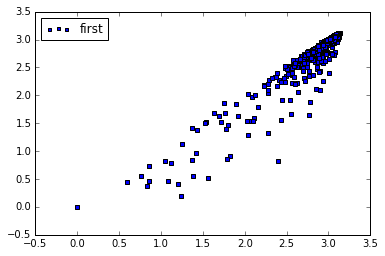

In [7]:
import matplotlib.pyplot as plt

x = df.entropy_personas[:1000]
y = df.entropy_palabras[:1000]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='first')
plt.legend(loc='upper left');
plt.show()

In [80]:
df.cantPalabra.describe()

count    7.587800e+04
mean     2.484080e+03
std      6.000610e+04
min      4.100000e+01
25%      6.900000e+01
50%      1.390000e+02
75%      4.300000e+02
max      7.509160e+06
Name: cantPalabra, dtype: float64

In [127]:

df['normCantPalabras']=(df.cantPalabra.apply(math.log,args=(2,))-df.cantPalabra.apply(math.log,args=(2,)).min())/(df.cantPalabra.apply(math.log,args=(2,)).max()-df.cantPalabra.apply(math.log,args=(2,)).min())
df['normCantPersonas']=(df.cantUsuariosTotal.apply(math.log,args=(2,))-df.cantUsuariosTotal.apply(math.log,args=(2,)).min())/(df.cantUsuariosTotal.apply(math.log,args=(2,)).max()-df.cantUsuariosTotal.apply(math.log,args=(2,)).min())

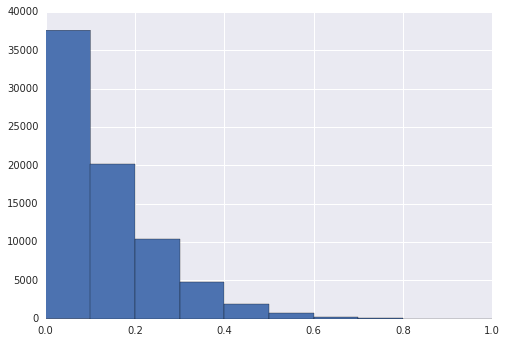

In [129]:
df.normCantPalabras.hist()

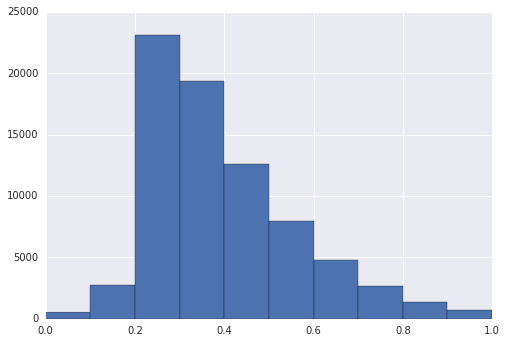

In [130]:
df.normCantPersonas.hist()

In [131]:
import math

df["information_value_palabras"] = (df.cantPalabra.apply(math.log,args=(2,))) * (df.shuffled_entropy_palabras - df.entropy_palabras)
df["information_value_personas"] = (df.cantPalabra.apply(math.log,args=(2,))) * (df.shuffled_entropy_personas - df.entropy_personas)
# df["information_value_personas_palabras"] = (df.cantUsuariosTotal.apply(math.log,args=(2,))) * (df.cantPalabra.apply(math.log,args=(2,))) * (df.shuffled_entropy_personas - df.entropy_personas) * (df.shuffled_entropy_palabras - df.entropy_palabras)
# df["information_value_personas_palabras"] = df.normCantPalabras * df.normCantPersonas * (df.shuffled_entropy_personas - df.entropy_personas) * (df.shuffled_entropy_palabras - df.entropy_palabras)
df["information_value_personas_palabras"] = df.normCantPalabras * df.normCantPersonas * (df.shuffled_entropy_personas - df.entropy_personas) * (df.shuffled_entropy_palabras - df.entropy_palabras)

#df["information_value_FnormMax"] = (df.FnormMax) * (df.shuffled_entropy - df.entropy)

df.sort_values(by="information_value_personas_palabras", ascending=False, inplace=True)
df['rankPalabras'] = df['information_value_palabras'].rank(ascending=False)
df['rankPersonas'] = df['information_value_personas'].rank(ascending=False)
df['rank_PalabrasPersonas'] = df['information_value_personas_palabras'].rank(ascending=False)


palabrasPersonas = [c for c in df.columns if re.match(r'.*PalabrasPersonas', c)]
#resumed = df[df.columns.difference(cant_palabras+fnorm_vars + palabrasPersonas)]
# resumed.to_csv('ivalue_entropia_palabras.csv')
df.iloc[:1000][['cantPalabra','cantUsuariosTotal','provinciaFnormMax','rankPalabras','rankPersonas','rank_PalabrasPersonas','normCantPersonas','normCantPalabras','shuffled_entropy_personas','entropy_personas']]

,cantPalabra,cantUsuariosTotal,provinciaFnormMax,rankPalabras,rankPersonas,rank_PalabrasPersonas,normCantPersonas,normCantPalabras,shuffled_entropy_personas,entropy_personas
palabra,,,,,,,,,,
chivilcoy,4074,469,buenosaires,4.0,3.0,1.0,0.532714,0.379500,3.113772,0.558161
oberá,4322,378,misiones,3.0,5.0,2.0,0.506352,0.384377,3.087210,0.569656
ushuaia,14966,1006,tierradelfuego,1.0,52.0,3.0,0.625981,0.486874,3.125681,1.453279
ush,2137,465,tierradelfuego,11.0,4.0,4.0,0.531668,0.326256,3.113278,0.362702
obera,2106,410,misiones,17.0,11.0,5.0,0.516283,0.325050,3.098025,0.543877
viedma,6584,666,rionegro,7.0,50.0,6.0,0.575573,0.419112,3.128636,1.294115
breñas,2590,170,chaco,6.0,2.0,7.0,0.408690,0.342121,3.042001,0.232404
logroño,2592,132,larioja,5.0,1.0,8.0,0.377771,0.342184,3.054012,0.089018
bragado,2805,294,buenosaires,9.0,12.0,9.0,0.475637,0.348702,3.076361,0.619135


In [38]:
df.sort_values(by='information_value_personas_palabras',ascending=False,inplace=True)
df.iloc[:7000][['cantPalabra','cantUsuariosTotal','provinciaFnormMax','rankPalabras','rankPersonas','rank_PalabrasPersonas']]
df.iloc[:7000][['cantPalabra','cantUsuariosTotal','provinciaFnormMax','rankPalabras','rankPersonas','rank_PalabrasPersonas','entropy_palabras','entropy_personas']].to_csv('resumido.csv')

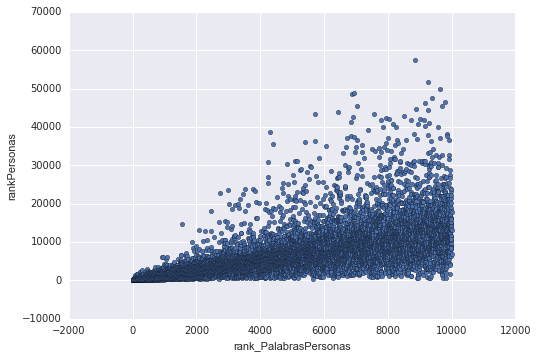

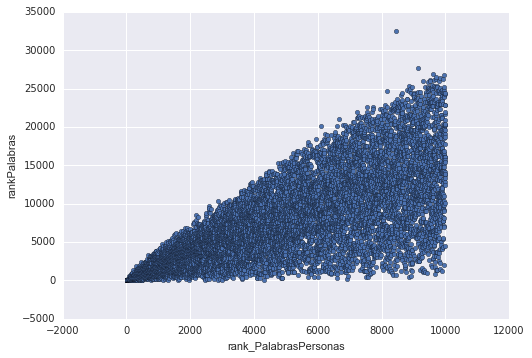

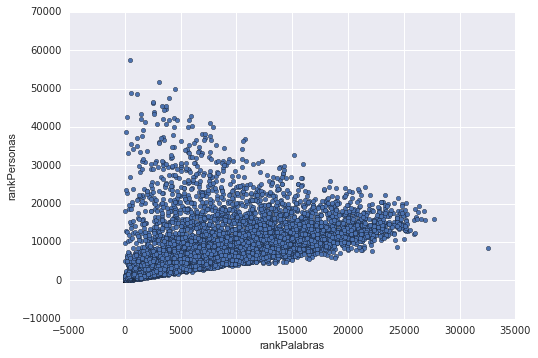

In [132]:
df.iloc[:10000].plot.scatter(x='rank_PalabrasPersonas',y='rankPersonas')
df.iloc[:10000].plot.scatter(x='rank_PalabrasPersonas',y='rankPalabras')
df.iloc[:10000].plot.scatter(x='rankPalabras',y='rankPersonas')

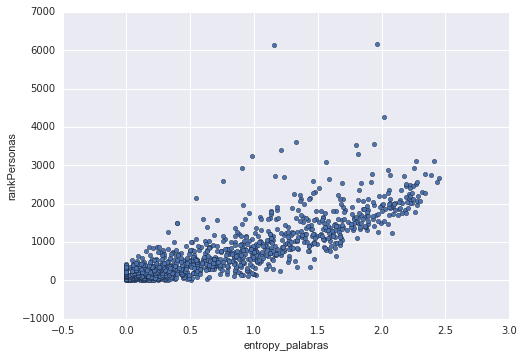

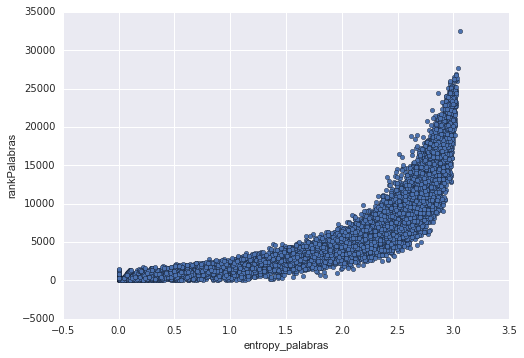

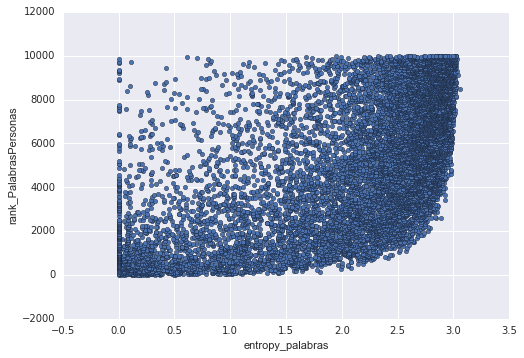

In [133]:
df.iloc[:1000].plot.scatter(x='entropy_palabras',y='rankPersonas')
df.iloc[:10000].plot.scatter(x='entropy_palabras',y='rankPalabras')
df.iloc[:10000].plot.scatter(x='entropy_palabras',y='rank_PalabrasPersonas')

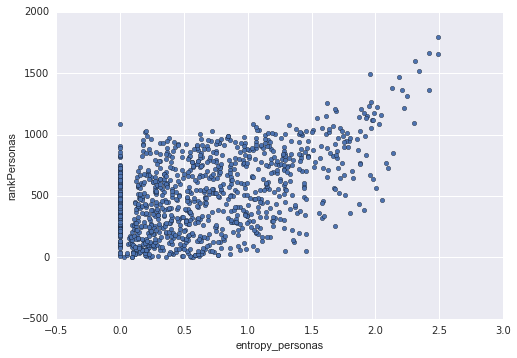

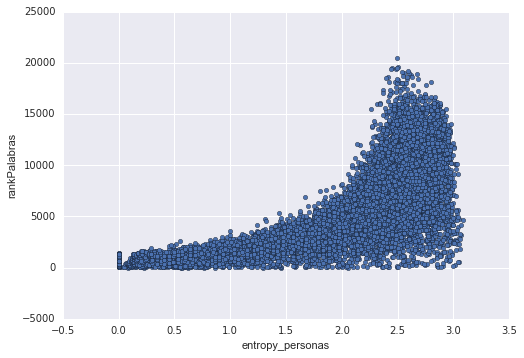

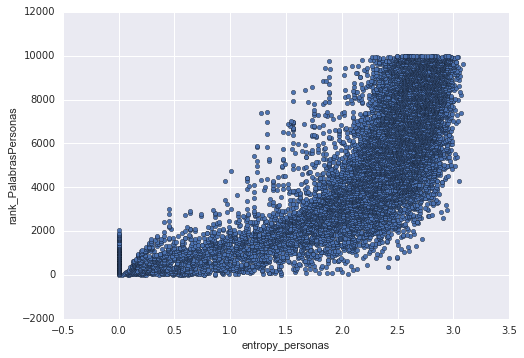

In [41]:
df.iloc[:1000].plot.scatter(x='entropy_personas',y='rankPersonas')
df.iloc[:10000].plot.scatter(x='entropy_personas',y='rankPalabras')
df.iloc[:10000].plot.scatter(x='entropy_personas',y='rank_PalabrasPersonas')

## Guardo los listados (resumidos, y extendidos) ordenados en base a las dos médidas de información

In [42]:
df.sort_values(by="information_value_palabras", ascending=False, inplace=True)
resumed = df[df.columns.difference(cant_palabras+fnorm_vars + palabrasPersonas)]
resumed.to_csv('ivalue_entropia_palabras_resumida.csv')
df.to_csv('ivalue_entropia_palabras.csv')

df.sort_values(by="information_value_personas", ascending=False, inplace=True)
resumed = df[df.columns.difference(cant_palabras+fnorm_vars + palabrasPersonas)]
resumed.to_csv('ivalue_entropia_personas_resumida.csv')
df.to_csv('ivalue_entropia_personas.csv')

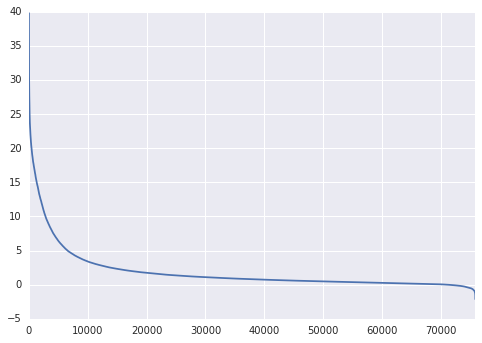

In [43]:
df.sort_values(by="information_value_palabras", ascending=False, inplace=True)
df2 = df.reset_index()
df2.information_value_palabras.plot.line()

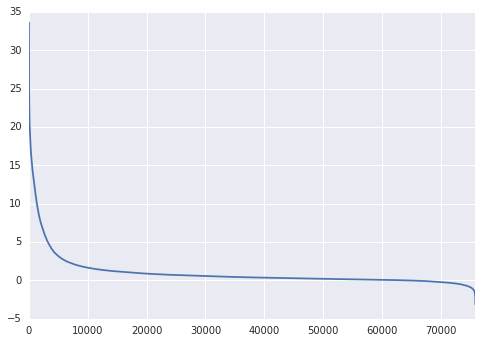

In [44]:
df.sort_values(by="information_value_personas", ascending=False, inplace=True)
df2 = df.reset_index()

df2.information_value_personas.plot.line()

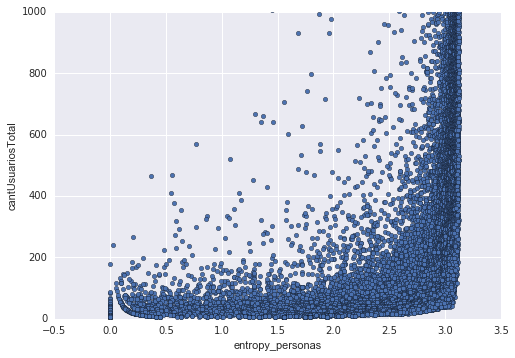

In [45]:
import seaborn
df.plot.scatter(x="entropy_personas", y="cantUsuariosTotal", ylim=[0, 1000])

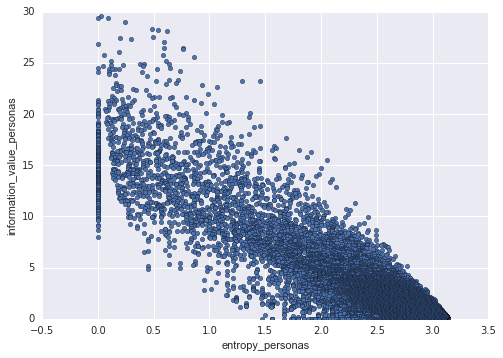

In [46]:
import seaborn
df.plot.scatter(x="entropy_personas", y="information_value_personas", ylim=[0, 30])

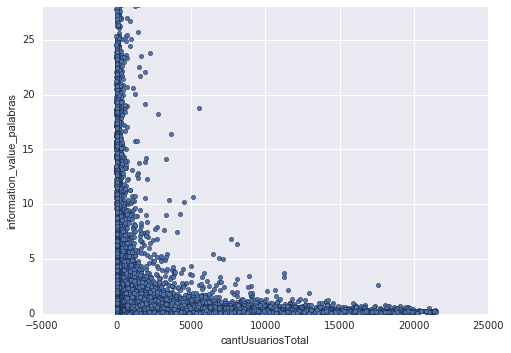

In [47]:
import seaborn
df.plot.scatter(x="cantUsuariosTotal", y="information_value_palabras", ylim=[0, 28])

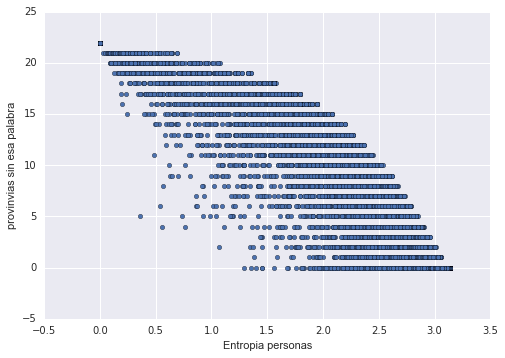

In [48]:
plt.figure(1)
df.plot.scatter(x="entropy_personas", y="provinciaSinEsaPalabra")
plt.xlabel("Entropia personas")
plt.ylabel("provinvias sin esa palabra")


plt.show()


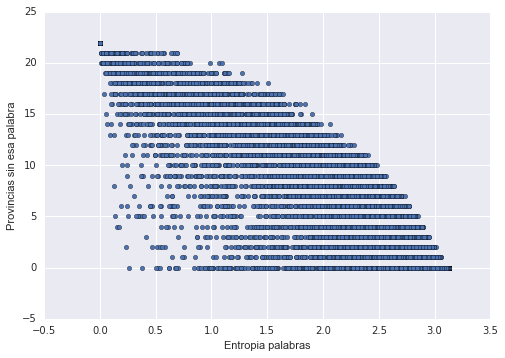

In [49]:

plt.figure(2)
df.plot.scatter(x="entropy_palabras", y="provinciaSinEsaPalabra")
plt.xlabel("Entropia palabras")
plt.ylabel("Provincias sin esa palabra")

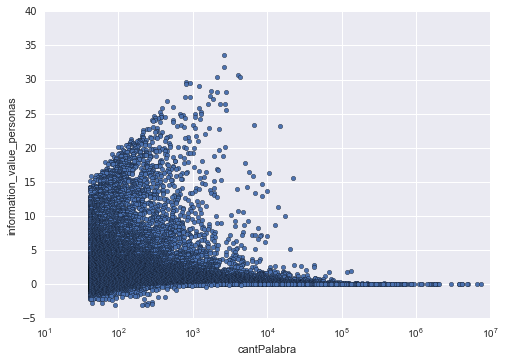

In [51]:
import seaborn
df.plot.scatter(y="information_value_personas", x="cantPalabra", logx=True)

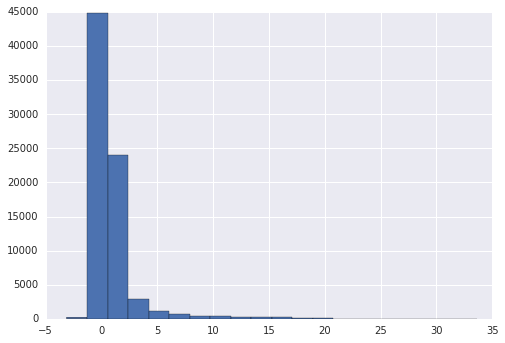

In [52]:
df.information_value_personas.hist(bins=20)

In [53]:
resumed[df.information_value_personas < 0].iloc[:100]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,FnormMax,FnormMin,cantPalabra,cantPalabrasTotales,cantUsuariosTotal,entropy_palabras,entropy_personas,information_value_palabras,information_value_personas,information_value_personas_palabras,maxDif,provinciaFnormMax,provinciaFnormMin,provinciaSinEsaPalabra,rankPalabras,rankPersonas,shuffled_entropy_palabras,shuffled_entropy_personas
palabra,,,,,,,,,,,,,,,,,,
beny,6.126468,0.105675,60,188487018,8,0.655149,1.667462,12.807746,-1.311593e-15,-8.531672e-15,57.974683,catamarca,entrerios,17,1897.0,64633.0,2.823421,1.667462
caffé,7.832024,0.112552,76,188487018,7,0.605616,1.945910,15.209806,-1.387319e-15,-9.481154e-15,69.585540,corrientes,chubut,16,1266.0,64634.0,3.039993,1.945910
cce,6.505314,0.112552,77,188487018,11,0.687150,1.846220,14.333410,-1.391506e-15,-1.101018e-14,57.798058,rionegro,chubut,16,1503.0,64635.0,2.974352,1.846220
sehr,10.739928,0.100082,90,188487018,10,0.575761,1.886697,15.669594,-1.441481e-15,-1.155815e-14,107.311546,santiago,rionegro,16,1166.0,64636.0,2.989493,1.886697
spl,8.756908,0.100082,111,188487018,6,0.865428,1.560710,14.939024,-1.508663e-15,-8.574656e-15,87.497546,neuquen,rionegro,18,1335.0,64637.0,3.064149,1.560710
superclub,12.304010,0.099246,118,188487018,7,0.312603,1.747868,19.051120,-1.528254e-15,-1.187567e-14,123.974370,neuquen,cordoba,17,560.0,64638.0,3.080597,1.747868
escuchános,12.968474,0.110847,125,188487018,7,0.490986,1.747868,17.915884,-1.546715e-15,-1.116801e-14,116.994431,tierradelfuego,neuquen,17,736.0,64639.0,3.062970,1.747868
cherokee,0.934665,0.106356,41,188487018,21,2.368716,2.623522,2.257099,-2.379231e-15,-4.402653e-15,8.788092,tierradelfuego,mendoza,7,15443.0,64640.5,2.790009,2.623522
predigo,0.700999,0.100082,41,188487018,40,2.838272,2.859281,-0.430674,-2.379231e-15,1.017859e-15,7.004260,tierradelfuego,rionegro,3,74803.0,64640.5,2.757886,2.859281


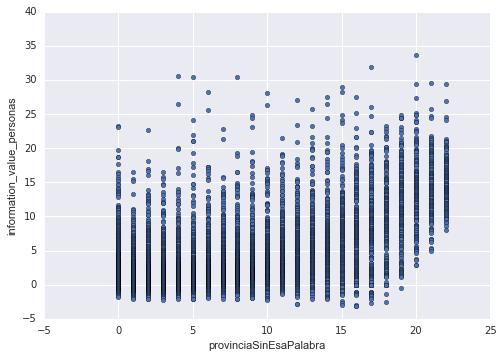

In [54]:
df.plot.scatter(x="provinciaSinEsaPalabra", y="information_value_personas")

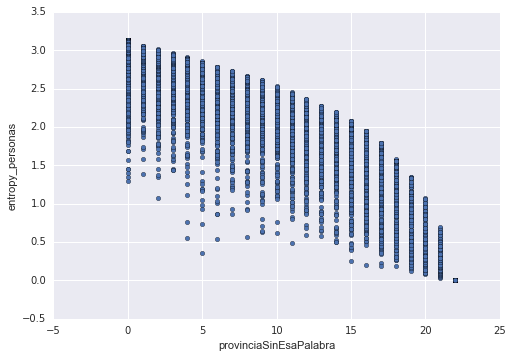

In [55]:
df.plot.scatter(x="provinciaSinEsaPalabra", y="entropy_personas")

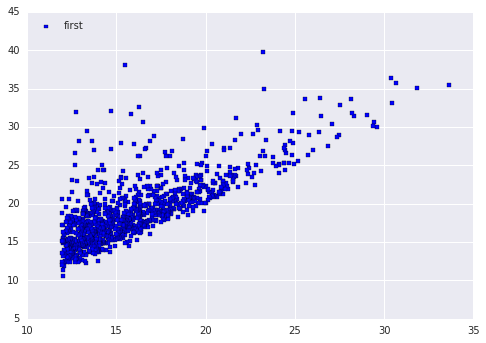

In [56]:
import seaborn
import matplotlib.pyplot as plt

x = df.information_value_personas[:1000]
y = df.information_value_palabras[:1000]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, y, s=10, c='b', marker="s", label='first')
plt.legend(loc='upper left');
plt.show()

In [57]:
df[df.provinciaSinEsaPalabra > 17].iloc[:5000][["cantPalabra", "provinciaSinEsaPalabra"]]

,cantPalabra,provinciaSinEsaPalabra
palabra,,
logroño,2592,20
chivil,811,21
sciurano,929,20
ipauss,812,22
plottier,908,20
vallerga,448,22
kraka,382,21
akil,366,20
unju,1282,19


In [58]:
df.cantPalabra.apply(math.log,args=(2,)).describe()

count    75878.000000
mean         7.709320
std          2.102951
min          5.357552
25%          6.108524
50%          7.118941
75%          8.748193
max         22.840220
Name: cantPalabra, dtype: float64

In [59]:
(df.shuffled_entropy_personas - df.entropy_personas).describe()

count    75878.000000
mean         0.142021
std          0.336259
min         -0.505702
25%          0.013384
50%          0.050509
75%          0.135005
max          3.062975
dtype: float64

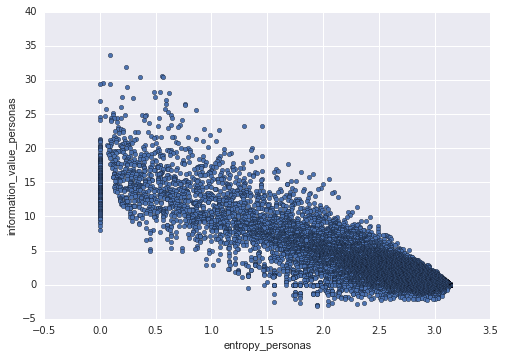

In [60]:
df.plot.scatter(x="entropy_personas", y="information_value_personas")

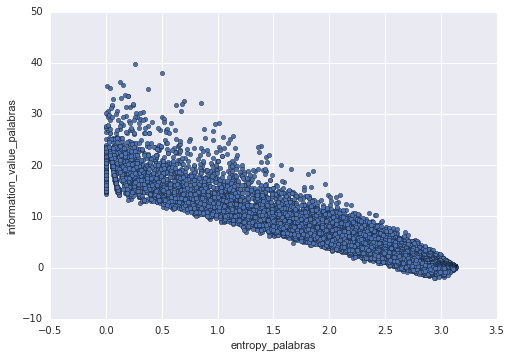

In [61]:
df.plot.scatter(x="entropy_palabras", y="information_value_palabras")

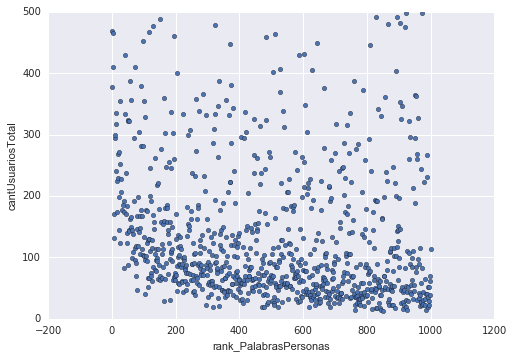

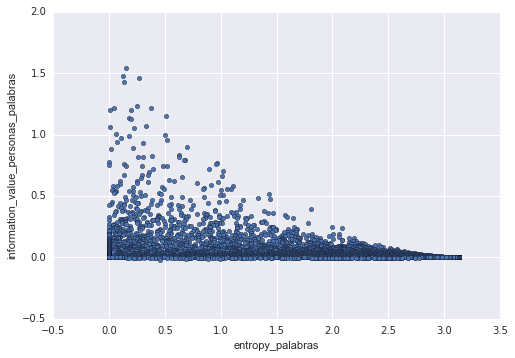

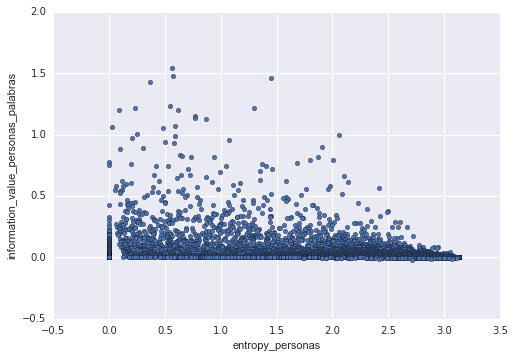

In [134]:
df.iloc[:1000].plot.scatter(x="rank_PalabrasPersonas", y="cantUsuariosTotal",ylim=[0,500])

df.plot.scatter(x="entropy_palabras", y="information_value_personas_palabras")
df.plot.scatter(x="entropy_personas", y="information_value_personas_palabras")
